## Testing multiscale info theory

In [1]:
# basic imports
import numpy as np                                        
import matplotlib.pyplot as plt     
import pickle
import pandas as pd

In [3]:
import sys
sys.path.append("../../../hspace/")
import hspace.measures
import importlib
importlib.reload(hspace.measures)

pymc is not installed - Bayesian entropy estimation will not work.
pymc is not installed - Bayesian entropy estimation will not work.


<module 'hspace.measures' from '../../../hspace/hspace/measures.py'>

### Generate random models

In [15]:
rf = np.random.randint(2, size=(128,128))

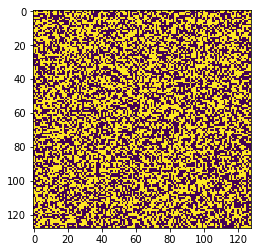

In [16]:
plt.imshow(rf)

### Downsample

Test separate methods:
- max vote
- average (note: possible outcomes increase!)


In [20]:
import scipy.misc as sm

In [26]:
from scipy import interpolate

In [31]:
from scipy import ndimage

In [41]:
rf2 = ndimage.maximum_filter(rf, size=2)

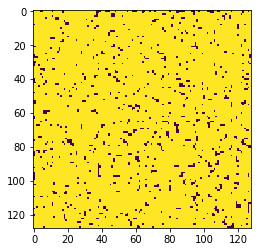

In [42]:
plt.imshow(rf2)

Try convolution:

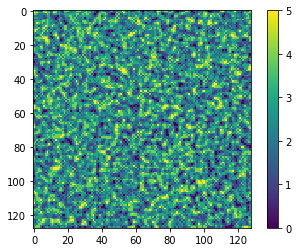

In [49]:
k = np.array([[0,1,0],[1,1,1],[0,1,0]])
plt.imshow(ndimage.convolve(rf, k))
plt.colorbar()

In [50]:
import PIL

In [52]:
from scipy.interpolate import RegularGridInterpolator

In [53]:
def f(x,y,z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(0, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
data = f(*np.meshgrid(x, y, z, indexing='ij', sparse=True))

In [54]:
my_interpolating_function = RegularGridInterpolator((x, y, z), data)

In [55]:
pts = np.array([[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]])
my_interpolating_function(pts)


array([125.80469388, 146.30069388])

In [58]:
x = np.arange(0,128)
y = np.arange(0,128)
interpolator = RegularGridInterpolator((x, y), rf)

In [61]:
xx = np.arange(0,128,2)
yy = np.arange(0,128,2)
xxx, yyy = np.meshgrid(xx, yy)

In [72]:
pts = np.array([xxx.ravel(), yyy.ravel()]).T
rf2 = interpolator(pts)

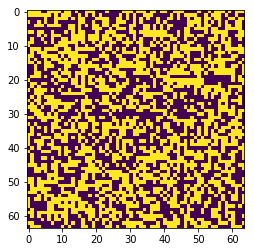

In [74]:
plt.imshow(rf2.reshape((64,64)))

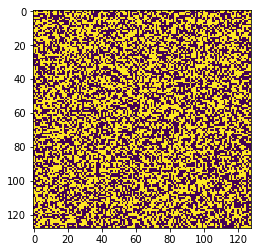

In [75]:
plt.imshow(rf)